In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from numpy import log2, zeros, mean, var, sum, loadtxt, arange, \
    array, cumsum, dot, transpose, diagonal, floor
# project quantities onto respective plots 
from mpl_toolkits.axes_grid1 import make_axes_locatable 
import pickle 

In [ ]:
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
sns.set_style("whitegrid")
outdir = './main_text_figures/'
!mkdir $outdir

# define system directories 
WT_apo_dir = "./hiapp_wt_apo/outdir_wt_hiapp_apo/"
S20G_apo_dir = "./hiapp_s20g_apo/outdir_s20g_hiapp_apo/"

# WT_A_outdir = "./outdir_wt_IAPP_YX-A-1/"
# WT_I_outdir = "./outdir_wt_IAPP_YX-I-1/"
# S20G_A_outdir = "./outdir_s20g_IAPP_YX-A-1/"
# S20G_I_outdir = "./outdir_s20g_IAPP_YX-I-1/"

# define the sequences to plot 
sequence_ol_both = ['K', 'C', 'N', 'T', 'A', 'T', 'C', 'A', 'T', 'Q', 'R', 'L', 'A', 'N', 'F', 'L', 'V', 'H', 'S', 'X', 'N', 'N', 'F', 'G', 'A', 'I', 'L', 'S', 'S', 'T', 'N', 'V', 'G', 'S', 'N', 'T', 'Y', '      NH$_2$']
sequence_ol_wt = ['K', 'C', 'N', 'T', 'A', 'T', 'C', 'A', 'T', 'Q', 'R', 'L', 'A', 'N', 'F', 'L', 'V', 'H', 'S', 'S', 'N', 'N', 'F', 'G', 'A', 'I', 'L', 'S', 'S', 'T', 'N', 'V', 'G', 'S', 'N', 'T', 'Y', '      NH$_2$']
sequence_ol_s20g= ['K', 'C', 'N', 'T', 'A', 'T', 'C', 'A', 'T', 'Q', 'R', 'L', 'A', 'N', 'F', 'L', 'V', 'H', 'S', 'G', 'N', 'N', 'F', 'G', 'A', 'I', 'L', 'S', 'S', 'T', 'N', 'V', 'G', 'S', 'N', 'T', 'Y', '      NH$_2$']

mkdir: ./comparison_figures/: File exists


In [4]:
colors = {
    "WT Apo": "tab:red",
    "WT + YX-A-1":"tab:green",
    "WT + YX-I-1":"tab:orange", 
    "S20G + YX-A-1" : "tab:green",
    "S20G + YX-I-1" : "tab:orange",
    "S20G Apo" : "tab:blue",    
}


from matplotlib.colors import ListedColormap
# Create a list of distinct gray values
num_grays = 8
grays = np.linspace(0.0, 0.8, num_grays)
# Create a ListedColormap with distinct gray values
custom_pastel_gray_cmap = ListedColormap([(gray, gray, gray) for gray in grays])

viridis_hex = ["#3E0651","#3A487B", "#478F8A", "#7AC76D", "#F9E855"]

# Figure 1

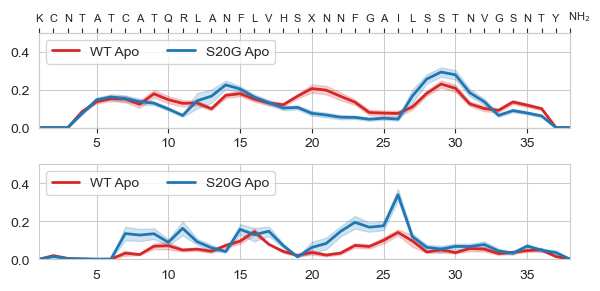

In [5]:

files = ['Hprop.err.dat','Eprop.err.dat']
all_dirs = [ WT_apo_dir, S20G_apo_dir]

labels = [
    "WT Apo",
    "S20G Apo",
]

fig, axes = plt.subplots(2, 1, figsize=(6,3.0))

for n, file in enumerate(files):
    count = 0 
    for directory in all_dirs: 
        attr = np.loadtxt(directory+file) # attr = attribute 
        upper = attr[:,1] + attr[:,2]
        lower = attr[:,1] - attr[:,2]

        label = labels[count]
        linest = "-"

        sns.lineplot(x=attr[:, 0], y=attr[:, 1],
                    color=colors[label], linewidth=2, linestyle=linest, label=label , ax=axes[n])
        axes[n].fill_between(attr[:, 0], upper, lower, color=colors[label], alpha=0.2)
        #plt.errorbar(attr[:, 0], attr[:, 1], attr[:,2], color=colors[label], alpha=0.5, linestyle="none")
        
        axes[n].set_xlim(1, 38)
        axes[n].set_ylim(0.0, 0.5)
        
        count += 1

# axes[1].set_xlabel('Residue', fontsize=12)
# axes[0].set_ylabel('Helix Fraction', fontsize=12)
# axes[1].set_ylabel('Sheet Fraction', fontsize=12)

axes[0].legend(loc='upper left', fontsize=10, ncol = 2)
axes[1].legend(loc='upper left', fontsize=10, ncol = 2)

ax2 = axes[0].twiny()
top_ticks = np.arange(0, 38, 1)
plt.grid(True)
plt.tight_layout()
ax2.set_xticks(top_ticks)
ax2.set_xticklabels([f'{i}' for i in sequence_ol_both[0::1]], fontsize=8)
ax2.grid(False)
plt.savefig(outdir+'Hprop.Eprop.wt.s20g.apo.pdf', dpi=300, bbox_inches='tight')

plt.show()

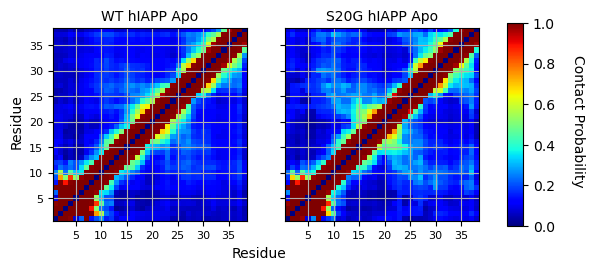

In [6]:
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
sns.reset_defaults()
file = "contactmap.dat"
fig, axs = plt.subplots(1,2, figsize=(5.5, 7.0),sharey=True,sharex=True)

all_dirs = [WT_apo_dir, S20G_apo_dir]

labels = [
    "WT hIAPP Apo",
    "S20G hIAPP Apo",
]
# known from computed plots, next time load in

count = 0 
for directory in all_dirs: 
    attr = np.loadtxt(directory+file) # attr = attribute 
    label = labels[count]
    im = axs[count].imshow(attr, vmax=1.0, vmin=0.0, cmap = "jet")
    axs[count].set_title(label,size=10,pad=5)
    
    #imaxes = plt.gca()
    count += 1

cax = fig.add_axes([0.95, 0.35, .03, 0.29])
fig.colorbar(im, cax=cax, orientation='vertical')
cax.tick_params(axis="x", labelsize=8)

# Set y-axis tick size
for n, ax in enumerate(axs):
    ax.set_xticks(np.arange(0, 38, 5)-1, np.arange(0,38,5) )
    ax.set_yticks(np.arange(0, 38, 5)-1, np.arange(0,38,5) )
    ax.set_xlim(-0.5,37.5)
    ax.set_ylim(-0.5,37.5)
    ax.tick_params(axis='x', labelsize=8)
    ax.tick_params(axis='y', labelsize=8)
    ax.grid(True)

fig.text(0.5, 0.31, 'Residue', ha='center', va='center', fontsize=10)
fig.text(1.08, 0.5, 'Contact Probability', ha='center', va='center', fontsize=10, rotation =270)
fig.text(0.06, 0.5, 'Residue', rotation=90, ha='center', va='center', fontsize=10)
plt.savefig('%s/contact.map.compare.s20g.wt.apo.pdf' % outdir, dpi=400,bbox_inches='tight')
plt.show()

Supplementary Figure of DSSP Bend assignments: 

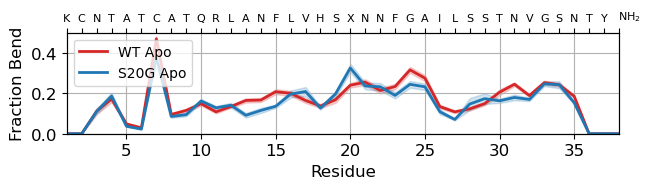

In [7]:
file = 'Sprop.err.dat'

all_dirs = [ WT_apo_dir, S20G_apo_dir]
labels = [
    "WT Apo",
    "S20G Apo",
]
fig, axes = plt.subplots(figsize=(6.5,2))
count = 0 
for directory in all_dirs: 
    attr = np.loadtxt(directory+file) # attr = attribute 
    upper = attr[:,1] + attr[:,2]
    lower = attr[:,1] - attr[:,2]
    label = labels[count]
    linest = "-"

    sns.lineplot(x=attr[:, 0], y=attr[:, 1],
                color=colors[label], label=label, linewidth=2, linestyle=linest)
    plt.fill_between(attr[:, 0], upper, lower, color=colors[label], alpha=0.2)
    count += 1

plt.ylim(0.0, 0.5)
plt.xlim(1, 38)
plt.xticks(ticks = range(0,39,5)[1:],fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Residue', fontsize=12)
plt.ylabel('Fraction Bend', fontsize=12)
plt.grid(True)
plt.tight_layout()

# set the sequence 
ax2 = axes.twiny()
top_ticks = np.arange(0, 38, 1)
plt.grid(True)
plt.tight_layout()
ax2.set_xticks(top_ticks)
ax2.set_xticklabels([f'{i}' for i in sequence_ol_both[0::1]], fontsize=8)
ax2.grid(False)
plt.savefig(outdir+'Sprop.s20g.wt.apo.pdf', dpi=300, bbox_inches='tight')
plt.show()


# Figure 2 

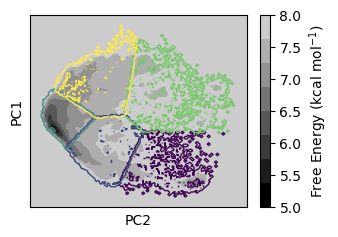

In [8]:
ct_outdir = "./hiapp_wt_apo/outdir_circuit_top_wt_hiapp_apo"

PCs = np.load(ct_outdir+"/incPCs.npy")

# get dictionary 
with open(ct_outdir+"/kmeans_cluster_indices.pkl", "rb") as f: 
    c_dict = pickle.load(f)

fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(3.5,2.5))


counts,xbins,ybins=np.histogram2d(PCs[:,1],PCs[:,0],bins=50,normed=True, range=[[np.min(PCs[:,1])-50, np.max(PCs[:,1])+50], [np.min(PCs[:,0])-50, np.max(PCs[:,0])+50]]) # LogNorm()
a = np.log(np.flipud(counts)+.000001)
T = 300
a = -(0.001987*T)*a

im = ax.imshow(a, interpolation='gaussian', extent=[ybins[0], ybins[-1], 
                                                    xbins[0], xbins[-1]], cmap=custom_pastel_gray_cmap, aspect='auto')
im.set_clim(5.0, 8.0)  # Adjust these values based on your data

# Add a colorbar to the plot
cbar = plt.colorbar(im, ax=ax, label='Free Energy (kcal mol$^{-1}$)')

# plot the outlines with a thicker line 

for i in range(len(c_dict.keys())):
        frame_ind = c_dict[i]
        x = PCs[frame_ind][:,0]
        y = PCs[frame_ind][:,1]
        
        # calculate the 2D density of the data given
        counts,xbins,ybins=np.histogram2d(x,y,bins=150,normed=True, range=[[np.min(PCs[:,0])-50, np.max(PCs[:,0])+50], [np.min(PCs[:,1])-50, np.max(PCs[:,1])+50]]) # LogNorm()
        # make the contour plot
        ax.contour(counts.transpose(),extent=[xbins.min(),xbins.max(), ybins.min(),ybins.max()],linewidths=1.0,colors=viridis_hex[i],
            linestyles='solid', levels=1)

plt.ylim(ybins.min(), ybins.max())
plt.xlim(xbins.min(), xbins.max())
plt.ylabel("PC1")
plt.xlabel("PC2")
plt.xticks([])
plt.yticks([])
plt.grid(False)

plt.savefig(outdir + "iapp_wt_apo_FES_on_PCs.pdf", dpi=400, bbox_inches="tight")

plt.show()

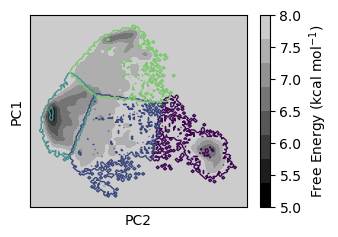

In [9]:
ct_outdir = "./hiapp_s20g_apo/outdir_circuit_top_s20g_hiapp_apo"

PCs = np.load(ct_outdir+"/incPCs.npy")

# get dictionary 
with open(ct_outdir+"/kmeans_cluster_indices.pkl", "rb") as f: 
    c_dict = pickle.load(f)

fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(3.5,2.5))


counts,xbins,ybins=np.histogram2d(PCs[:,1],PCs[:,0],bins=50,normed=True, range=[[np.min(PCs[:,1])-50, np.max(PCs[:,1])+50], [np.min(PCs[:,0])-50, np.max(PCs[:,0])+50]]) # LogNorm()
a = np.log(np.flipud(counts)+.000001)
T = 300
a = -(0.001987*T)*a

im = ax.imshow(a, interpolation='gaussian', extent=[ybins[0], ybins[-1], 
                                                    xbins[0], xbins[-1]], cmap=custom_pastel_gray_cmap, aspect='auto')
im.set_clim(5.0, 8.0)  # Adjust these values based on your data

# Add a colorbar to the plot
cbar = plt.colorbar(im, ax=ax, label='Free Energy (kcal mol$^{-1}$)')

# plot the outlines with a thicker line 

for i in range(len(c_dict.keys())):
        frame_ind = c_dict[i]
        x = PCs[frame_ind][:,0]
        y = PCs[frame_ind][:,1]
        
        # calculate the 2D density of the data given
        counts,xbins,ybins=np.histogram2d(x,y,bins=150,normed=True, range=[[np.min(PCs[:,0])-50, np.max(PCs[:,0])+50], [np.min(PCs[:,1])-50, np.max(PCs[:,1])+50]]) # LogNorm()
        # make the contour plot
        ax.contour(counts.transpose(),extent=[xbins.min(),xbins.max(), ybins.min(),ybins.max()],linewidths=1.0,colors=viridis_hex[i],
            linestyles='solid', levels=1)

plt.ylim(ybins.min(), ybins.max())
plt.xlim(xbins.min(), xbins.max())
plt.ylabel("PC1")
plt.xlabel("PC2")
plt.xticks([])
plt.yticks([])
plt.grid(False)

plt.savefig(outdir + "iapp_s20g_apo_FES_on_PCs.pdf", dpi=400, bbox_inches="tight")

plt.show()

In [10]:
def kl_divergence(p, q): 
    return np.sum(np.where(p!= 0, p * np.log(p/q), 0))

In [11]:
# get dictionary 
with open("./outdir_wt_hiapp_apo/kmeans_cluster_indices.pkl", "rb") as f: 
    c_dict_wt = pickle.load(f)

with open("./outdir_wt_hiapp_apo/kmeans_cluster_indices.pkl", "rb") as f: 
    c_dict_s20g = pickle.load(f)

psystems_apo = ["wt_iapp_apo", "s20g_iapp_apo"]
apo_labels = ["WT Apo","S20G Apo"]
dicts_apo = [c_dict_wt, c_dict_s20g]

In [12]:
# compute contact map and save the model input as a 1D probability distribution of pairs that is discrete 
for n in range(len(dicts_apo)): 
    c_dict = dicts_apo[n]
    name = psystems_apo[n]

    # plot by the number of clusters 
    for i in range(len(c_dict.keys())):
        # calculate map 
        frame_ind = c_dict[i]
        #####################################
        # instead should save a model_input for contacts.
        probability_pairs_distribution = (np.sum(model_input, axis=0)/model_input.shape[0]).T
        np.save(outdir + "contact_pairs_probability_distribution_" +psystems_apo[n] +"_c" +str(i+1) +  ".npy", probability_pairs_distribution)

NameError: name 'model_input' is not defined

In [ ]:
### sankey diagram to see how similar the clusters are to one another ###
# calculate the kl divergence 
metric = [41501,35501]
inverse_kl_divergence = np.zeros(shape=(4, 5))

sankey_label = []

sankey_source = []
sankey_target = []

sankey_value = []

other_metric_index = [1] # don't need this but added in case many methods used in the future, added for generalization purposes
for n in range(len(metric) - 1): # actually seems convoluted, but its only measuring tsne clusters with circuit top clusters (one direction)
    c_dict = dicts_apo[n]
    c_dict_other = dicts_apo[other_metric_index[n]]

    # plot by the number of clusters 
    for i in range(len(c_dict.keys())): # tsne thread
        # initialize labels 
        label_i = i + len(c_dict_other.keys())
        label_j = 0 # reindex the same label 
        for j in range(len(c_dict_other.keys())): # circuit topology thread 
            # set source start and end 
            sankey_source.append(label_i)
            sankey_target.append(label_j)

            # calculate the kl divergence 
            frame_ind_p = c_dict[i]
            frame_ind_q = c_dict_other[j]
            p = np.load(outdir+ "contact_pairs_probability_distribution_" + psystems_apo[n] +"_c" +str(i+1) +  ".npy") + 0.000000001
            q = np.load(outdir+ "contact_pairs_probability_distribution_" + psystems_apo[n+1] +"_c" +str(j+1) +  ".npy") + 0.000000001

            print(j, i)
            val = np.abs(1/(kl_divergence(p, q )))
            inverse_kl_divergence[j][i] = val
            sankey_value.append(val)
            
            # to make sure to keep track of indices
            label_j +=1


# make labels one after other 
for j in range(len(c_dict_other.keys())): 
    frame_ind = c_dict_other[j]
    sankey_label.append(psystems_apo[n+1] + " C" + str(j + 1) + ", P=" + str(np.round(len(frame_ind)/int(metric[n+1]), 2)))
for i in range(len(c_dict.keys())):
    frame_ind = c_dict[i]
    sankey_label.append(psystems_apo[n] + " C" + str(i + 1) + ", P=" + str(np.round(len(frame_ind)/int(metric[n]), 2)))

fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.3),
      label = sankey_label,
      color = ["rgba(31, 119, 180, 0.8)",
                    "rgba(255, 127, 14, 0.8)",
                    "rgba(44, 160, 44, 0.8)",
                    "rgba(214, 39, 40, 0.8)",]
    ),
    link = dict(
      source = sankey_source,
      target = sankey_target,
      value = sankey_value,
      color = ["rgba(31, 119, 180, 0.8)",
                    "rgba(255, 127, 14, 0.8)",
                    "rgba(44, 160, 44, 0.8)",
                    "rgba(214, 39, 40, 0.8)",
                    "rgba(31, 119, 180, 0.8)",
                    "rgba(255, 127, 14, 0.8)",
                    "rgba(44, 160, 44, 0.8)",
                    "rgba(214, 39, 40, 0.8)",
                    "rgba(31, 119, 180, 0.8)",
                    "rgba(255, 127, 14, 0.8)",
                    "rgba(44, 160, 44, 0.8)",
                    "rgba(214, 39, 40, 0.8)",
                    "rgba(31, 119, 180, 0.8)",
                    "rgba(255, 127, 14, 0.8)",
                    "rgba(44, 160, 44, 0.8)",
                    "rgba(214, 39, 40, 0.8)",]
  ))])

fig.update_layout(title_text="1 / (KL Divergence) T-SNE and Circuit Topology Clustering Analysis", font_size=10)
fig.show()

Supplementary Figures that follow characterization. 

52.50386 27.854052 2.71856684318151 0.8179582219650252 23 0
52.50386 27.854052 2.71856684318151 0.8179582219650252 23 0
52.50386 27.854052 2.71856684318151 0.8179582219650252 23 0


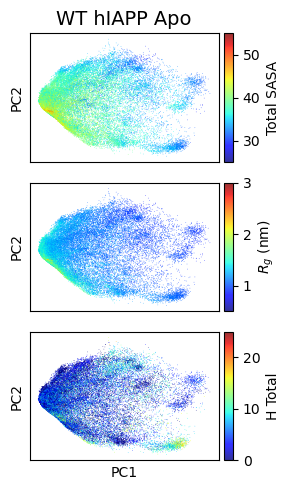

In [21]:
# get pcs 
ct_outdir = "./outdir_wt_hiapp_apo"

PCs = np.load(ct_outdir+"/incPCs.npy")

# get dictionary 
with open(ct_outdir+"/kmeans_cluster_indices.pkl", "rb") as f: 
    c_dict = pickle.load(f)

# load in quantities 
Rg = np.load(ct_outdir+"/Rg_total" + ".npy")
Sa = np.load(ct_outdir+"/Sa_total" + ".npy")
H_tot = np.load(ct_outdir+"/H_total" + ".npy")
solv_sum = np.sum(np.load(ct_outdir+"/sasa.npy"), axis=1)
# labels 
# lbls =["$R_g$", "$S_a$", "H$_{total}$", "SASA"]
lbls = ["", "", "", ""]
cbar_lbl = ["Total SASA", "$R_g$ (nm)", "H Total"]

# create bounds for the plot 
bds=[[25, 55], [0.5,3.0], [0, 25]]

incPC1 = PCs[:,0]
incPC2 = PCs[:,1]
# create one plot to show all 4 quantities 
fig, axes = plt.subplots(3,1, figsize=(3,5), sharey=True, sharex=True)
ax = axes.flatten()
# project onto the surface 
for n, var in enumerate([solv_sum, Rg, H_tot]): 
    print(solv_sum.max(), solv_sum.min(), Rg.max(), Rg.min(), H_tot.max(), H_tot.min())
    scatt = ax[n].scatter(incPC1,incPC2, marker = ".", alpha=0.8, c=var, cmap="jet", s=1, edgecolors="None",  vmin=bds[n][0], vmax=bds[n][1])
    # ax.legend(loc='best', ncol=1)
    ax[n].set_title(lbls[n])
    ax[n].set_ylabel("PC2")
    ax[n].grid(False)
    ax[n].set_xticks([])
    ax[n].set_yticks([])
    # Add color bar
    divider = make_axes_locatable(ax[n])
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar = plt.colorbar(scatt, cax=cax)
    cbar.set_label(cbar_lbl[n])  # Set your desired label
axes[0].set_title("WT hIAPP Apo", fontsize=14)
axes[-1].set_xlabel("PC1")
plt.tight_layout()
plt.savefig( outdir + "iapp_wt_apo_project_SASA_Rg_H_total_no_ticks.png", dpi=400, bbox_inches="tight")

plt.show()

52.037876 27.693115 2.640734240500413 0.8357335362365771 21 0
52.037876 27.693115 2.640734240500413 0.8357335362365771 21 0
52.037876 27.693115 2.640734240500413 0.8357335362365771 21 0


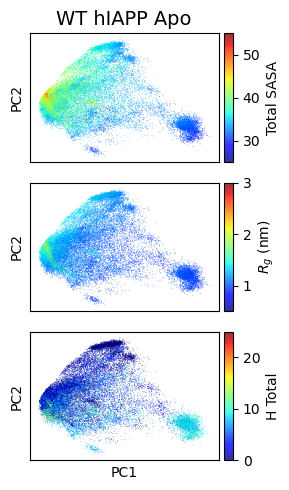

In [23]:
# get pcs 
ct_outdir = "./outdir_s20g_hiapp_apo"

PCs = np.load(ct_outdir+"/incPCs.npy")

# get dictionary 
with open(ct_outdir+"/kmeans_cluster_indices.pkl", "rb") as f: 
    c_dict = pickle.load(f)

# load in quantities 
Rg = np.load(ct_outdir+"/Rg_total" + ".npy")
Sa = np.load(ct_outdir+"/Sa_total" + ".npy")
H_tot = np.load(ct_outdir+"/H_total" + ".npy")
solv_sum = np.sum(np.load(ct_outdir+"/sasa.npy"), axis=1)
# labels 
# lbls =["$R_g$", "$S_a$", "H$_{total}$", "SASA"]
lbls = ["", "", "", ""]
cbar_lbl = ["Total SASA", "$R_g$ (nm)", "H Total"]

# create bounds for the plot 
bds=[[25, 55], [0.5,3.0], [0, 25]]

incPC1 = PCs[:,0]
incPC2 = PCs[:,1]
# create one plot to show all 4 quantities 
fig, axes = plt.subplots(3,1, figsize=(3,5), sharey=True, sharex=True)
ax = axes.flatten()
# project onto the surface 
for n, var in enumerate([solv_sum, Rg, H_tot]): 
    print(solv_sum.max(), solv_sum.min(), Rg.max(), Rg.min(), H_tot.max(), H_tot.min())
    scatt = ax[n].scatter(incPC1,incPC2, marker = ".", alpha=0.8, c=var, cmap="jet", s=1, edgecolors="None",  vmin=bds[n][0], vmax=bds[n][1])
    # ax.legend(loc='best', ncol=1)
    ax[n].set_title(lbls[n])
    ax[n].set_ylabel("PC2")
    ax[n].grid(False)
    ax[n].set_xticks([])
    ax[n].set_yticks([])
    # Add color bar
    divider = make_axes_locatable(ax[n])
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar = plt.colorbar(scatt, cax=cax)
    cbar.set_label(cbar_lbl[n])  # Set your desired label
axes[0].set_title("WT hIAPP Apo", fontsize=14)
axes[-1].set_xlabel("PC1")
plt.tight_layout()
plt.savefig( outdir + "iapp_s20g_apo_project_SASA_Rg_H_total_no_ticks.png", dpi=400, bbox_inches="tight")

plt.show()

# Figure 3 

In [6]:
WT_A_outdir = "./outdir_wt_hiapp_yxa1/"
WT_I_outdir = "./outdir_wt_hiapp_yxi1/"
S20G_A_outdir = "./outdir_s20g_hiapp_yxa1/"
S20G_I_outdir = "./outdir_s20g_hiapp_yxi1/"

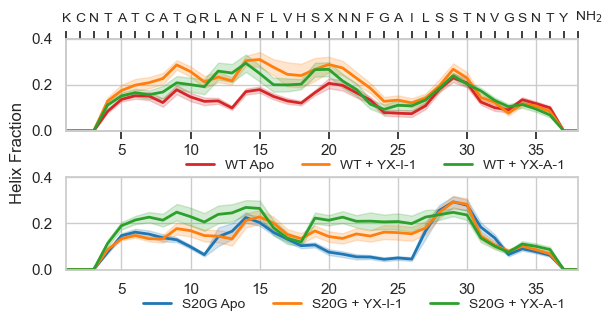

In [25]:
# Helical Fraction of each system 
# both WT and S20G serries 
sns.set(style='whitegrid')

file = 'Hprop.err.dat'
boundfile = 'Hprop.bound.err.dat'

all_dirs = [WT_apo_dir, WT_I_outdir, WT_A_outdir]

labels = [
    "WT Apo",
    "WT + YX-I-1", 
    "WT + YX-A-1"
    
]

new_labels = [
    "WT Apo",
    "WT + YX-I-1",
    "WT + YX-A-1"
    
]

fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(6.6,3.0))
for k, ax in enumerate(axs.flatten()): 
    if k > 0: 
        all_dirs = [S20G_apo_dir, S20G_I_outdir, S20G_A_outdir]
        labels=["S20G Apo", "S20G + YX-I-1", "S20G + YX-A-1"]
        new_labels = ["S20G Apo", "S20G + YX-I-1", "S20G + YX-A-1"]
    count = 0 
    for directory in all_dirs: 
        attr = np.loadtxt(directory+file) # attr = attribute 
        upper = attr[:,1] + attr[:,2]
        lower = attr[:,1] - attr[:,2]
        label = labels[count]
        sns.lineplot(x=attr[:, 0], y=attr[:, 1],
                    color=colors[label], label=new_labels[count], linewidth=2, ax=ax)
        ax.fill_between(attr[:, 0], upper, lower, color=colors[label], alpha=0.2)
        count += 1



    ax.set_ylim(0.0, 0.4)
    ax.set_xlim(1, 38)
    # ax.set_xticks(fontsize=12)
    # ax.set_yticks(fontsize=12)
    #plt.xlabel('Residue', fontsize=22, labelpad=30)
    if k < 1: 
        axs[0].grid(True)
        ax2 = axs[0].twiny()
        top_ticks = np.arange(0, 38, 1)

        ax2.set_xticks(top_ticks)
        ax2.set_xticklabels([f'{i}' for i in sequence_ol_both[::1]], fontsize=10)
        ax2.grid(False)
fig.text(0.04, 0.5, 'Helix Fraction', va='center', rotation='vertical')       
axs[0].legend(loc='upper right', fontsize=10, bbox_to_anchor=(1.0, -0.17), ncol=3, frameon=False)
axs[1].legend(loc='upper right', fontsize=10, bbox_to_anchor=(1.0, -0.17), ncol=3, frameon=False)
plt.subplots_adjust(wspace=0.1, hspace=0.5)

plt.savefig(outdir+'Hprop.wt.s20g.apo.yxi1.yxa1.fig3.pdf', dpi=400, bbox_inches='tight')

plt.show()

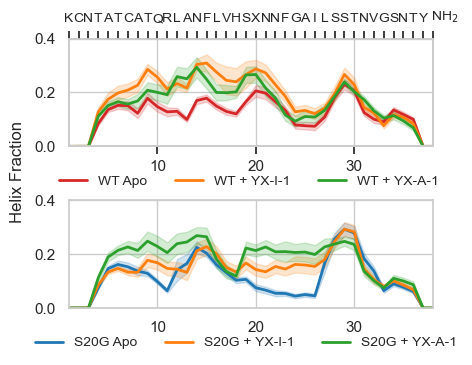

In [26]:
# Helical Fraction of each system 
# both WT and S20G serries 
sns.set(style='whitegrid')

file = 'Hprop.err.dat'
boundfile = 'Hprop.bound.err.dat'

all_dirs = [WT_apo_dir, WT_I_outdir, WT_A_outdir]

labels = [
    "WT Apo",
    "WT + YX-I-1", 
    "WT + YX-A-1"
    
]

new_labels = [
    "WT Apo",
    "WT + YX-I-1",
    "WT + YX-A-1"
    
]

fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(4.7,3.5))
for k, ax in enumerate(axs.flatten()): 
    if k > 0: 
        all_dirs = [S20G_apo_dir, S20G_I_outdir, S20G_A_outdir]
        labels=["S20G Apo", "S20G + YX-I-1", "S20G + YX-A-1"]
        new_labels = ["S20G Apo", "S20G + YX-I-1", "S20G + YX-A-1"]
    count = 0 
    for directory in all_dirs: 
        attr = np.loadtxt(directory+file) # attr = attribute 
        upper = attr[:,1] + attr[:,2]
        lower = attr[:,1] - attr[:,2]
        label = labels[count]
        sns.lineplot(x=attr[:, 0], y=attr[:, 1],
                    color=colors[label], label=new_labels[count], linewidth=2, ax=ax)
        ax.fill_between(attr[:, 0], upper, lower, color=colors[label], alpha=0.2)
        count += 1



    ax.set_ylim(0.0, 0.4)
    ax.set_xlim(1, 38)
    # ax.set_xticks(fontsize=12)
    # ax.set_yticks(fontsize=12)
    #plt.xlabel('Residue', fontsize=22, labelpad=30)
    if k < 1: 
        axs[0].grid(True)
        ax2 = axs[0].twiny()
        top_ticks = np.arange(0, 38, 1)

        ax2.set_xticks(top_ticks)
        ax2.set_xticklabels([f'{i}' for i in sequence_ol_both[::1]], fontsize=10)
        ax2.grid(False)
fig.text(0.0, 0.5, 'Helix Fraction', va='center', rotation='vertical')       
axs[0].legend(loc='upper right', fontsize=10, bbox_to_anchor=(1.05, -0.15), ncol=3, frameon=False)
axs[1].legend(loc='upper right', fontsize=10, bbox_to_anchor=(1.10, -0.15), ncol=3, frameon=False)
plt.subplots_adjust(wspace=0.1, hspace=0.5)

plt.savefig(outdir+'Hprop.wt.s20g.apo.yxi1.yxa1.fig3a.pdf', dpi=400, bbox_inches='tight')

plt.show()

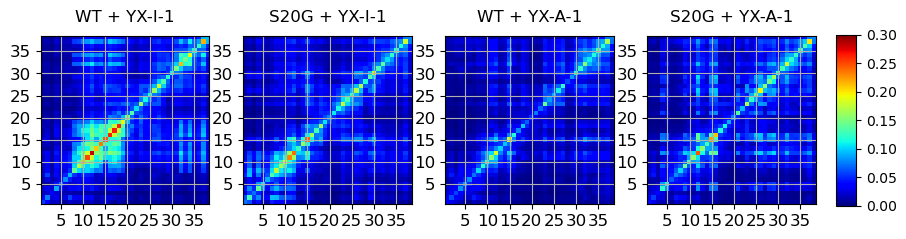

In [27]:
from mpl_toolkits.axes_grid1 import make_axes_locatable 
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
sns.reset_defaults()

# plot all  
fig, axs = plt.subplots(1,4, figsize=(10, 3))

file = "dual_contact_map.dat"
all_dirs = [WT_I_outdir, S20G_I_outdir, WT_A_outdir, S20G_A_outdir]
labels = [
    "WT + YX-I-1",
    "S20G + YX-I-1",
    "WT + YX-A-1",
    "S20G + YX-A-1"
]

count = 0 
for directory in all_dirs: 
    attr = np.loadtxt(directory+file) # attr = attribute 
    label = labels[count]
    #_map = make_c_map(trj)
    im = axs[count].imshow(attr, vmax=0.3, vmin=0.0, cmap = "jet")
    axs[count].set_title(label,size=12,pad=10)
    imaxes = plt.gca()
    count += 1


# Add the colorbar below the subplots
cax = fig.add_axes([0.92, 0.21, .02, 0.57])  # [left, bottom, width, height]
fig.colorbar(im, cax=cax, orientation='vertical')
cax.tick_params(axis="x", labelsize=12)

# divider = make_axes_locatable(axs[3])
# cax = divider.append_axes("right", size="5%", pad=0.05)
# cbar = plt.colorbar(im, cax=cax)
# cbar.set_label("Contact Probability",fontsize=12)

# Set a centered x-label for the figure
#fig.text(0.5, -0.08, 'Residue', ha='center', va='center', fontsize=22)

# Set y-axis tick size
for n, ax in enumerate(axs):
    # offset by 1 for the numbering 
    ax.set_xticks(np.arange(0, 38, 5)-1, np.arange(0,38,5) )
    ax.set_yticks(np.arange(0, 38, 5)-1, np.arange(0,38,5) )
    ax.set_xlim(-0.5,37.5)
    ax.set_ylim(-0.5,37.5)
    # ax.ylabel("Residue")
    # ax.xlabel("Residue")

# Set x-axis tick size
for ax in axs:
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
    ax.grid(True)
plt.savefig('%s/dual_contacts.compare.s20g.wt.yxi1.yxa1.pdf' % outdir, dpi=400,bbox_inches='tight')
plt.show()


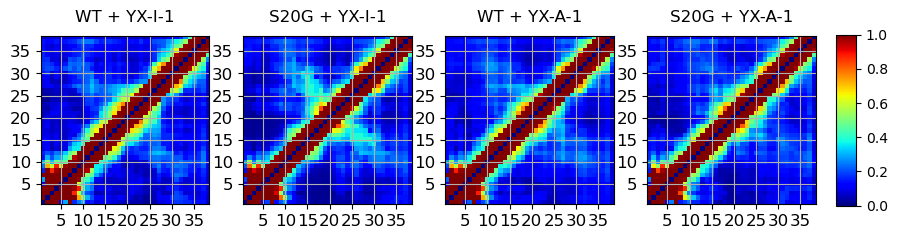

In [28]:
from mpl_toolkits.axes_grid1 import make_axes_locatable 
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
sns.reset_defaults()

# plot all  
fig, axs = plt.subplots(1,4, figsize=(10, 3))

file = "contactmap.dat"
all_dirs = [WT_I_outdir, S20G_I_outdir, WT_A_outdir, S20G_A_outdir]
labels = [
    "WT + YX-I-1",
    "S20G + YX-I-1",
    "WT + YX-A-1",
    "S20G + YX-A-1"
]

count = 0 
for directory in all_dirs: 
    attr = np.loadtxt(directory+file) # attr = attribute 
    label = labels[count]
    #_map = make_c_map(trj)
    im = axs[count].imshow(attr, vmax=1.0, vmin=0.0, cmap = "jet")
    axs[count].set_title(label,size=12,pad=10)
    imaxes = plt.gca()
    count += 1


# Add the colorbar below the subplots
cax = fig.add_axes([0.92, 0.21, .02, 0.57])  # [left, bottom, width, height]
fig.colorbar(im, cax=cax, orientation='vertical')
cax.tick_params(axis="x", labelsize=12)

# divider = make_axes_locatable(axs[3])
# cax = divider.append_axes("right", size="5%", pad=0.05)
# cbar = plt.colorbar(im, cax=cax)
# cbar.set_label("Contact Probability",fontsize=12)

# Set a centered x-label for the figure
#fig.text(0.5, -0.08, 'Residue', ha='center', va='center', fontsize=22)

# Set y-axis tick size
for n, ax in enumerate(axs):
    # offset by 1 for the numbering 
    ax.set_xticks(np.arange(0, 38, 5)-1, np.arange(0,38,5) )
    ax.set_yticks(np.arange(0, 38, 5)-1, np.arange(0,38,5) )
    ax.set_xlim(-0.5,37.5)
    ax.set_ylim(-0.5,37.5)
    # ax.ylabel("Residue")
    # ax.xlabel("Residue")

# Set x-axis tick size
for ax in axs:
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
    ax.grid(True)
plt.savefig('%s/protein_contacts.compare.s20g.wt.yxi1.yxa1.pdf' % outdir, dpi=400,bbox_inches='tight')
plt.show()


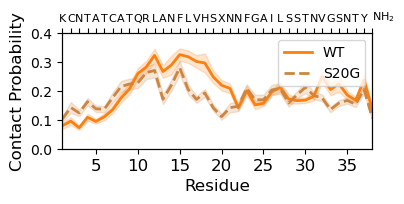

In [29]:
# compare contacts 
file = 'contact.be.pyblock.dat'

labels = ["WT",
    "S20G",
]

colors = ["tab:orange", "peru"]

fig, ax = plt.subplots(figsize=(4.0,1.5))
all_dirs = [WT_I_outdir, S20G_I_outdir]

count = 0 
for directory in all_dirs: 
    attr = np.loadtxt(directory+file) # attr = attribute 
    upper = attr[:,1] + attr[:,2]
    lower = attr[:,1] - attr[:,2]
    linest = "-"
    label = labels[count]
    if label[0] == "S": 
        linest="--"
    sns.lineplot(x=attr[:, 0], y=attr[:, 1],
                color=colors[count], label=label, linewidth=2, linestyle=linest)
    plt.fill_between(attr[:, 0], upper, lower, color=colors[count], alpha=0.2)
    #plt.errorbar(attr[:, 0], attr[:, 1], attr[:,2], color=colors[label], alpha=0.5, linestyle="none")
    count += 1

# set sequence on top and xticks on bottom
bottom_ticks = np.arange(0, 38, 5)
top_ticks = np.arange(0, 38, 1)
ax.set_xticks(bottom_ticks)
ax.set_xticklabels([f'{i}' for i in np.arange(0,38,5)], fontsize=12)
ax.set_ylim(0.0, 0.4)
ax.set_xlim(1, 38)

ax2 = ax.twiny()
ax2.set_xticks(top_ticks)
ax2.set_xticklabels([f'{i}' for i in sequence_ol_both[::1]], fontsize=8)

ax.set_xlabel('Residue', fontsize=12)
ax.set_ylabel('Contact Probability', fontsize=12)
#ax.legend(loc='upper center', fontsize=8, ncol = 2, )#bbox_to_anchor=(0.9, -0.28), frameon=False)
# Specify which major gridlines to show on both axes
ax.set_xticks([5, 10, 15, 20, 25, 30, 35], minor=False)
ax2.grid(False)

# Hide the legend
ax.legend(fontsize=10)
plt.yticks(fontsize=12)

plt.savefig('%s/wt.s20g.yxi1.contact.pdf' % outdir, dpi=300, bbox_inches="tight")
plt.show()

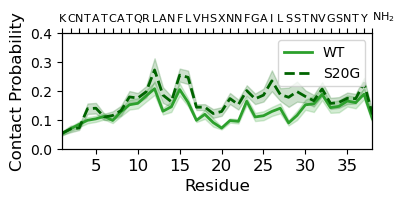

In [30]:
# compare contacts 
file = 'contact.be.pyblock.dat'

labels = ["WT",
    "S20G",
]

colors = ["tab:green", "darkgreen"]

fig, ax = plt.subplots(figsize=(4.0,1.5))
all_dirs = [WT_A_outdir, S20G_A_outdir]

count = 0 
for directory in all_dirs: 
    attr = np.loadtxt(directory+file) # attr = attribute 
    upper = attr[:,1] + attr[:,2]
    lower = attr[:,1] - attr[:,2]
    linest = "-"
    label = labels[count]
    if label[0] == "S": 
        linest="--"
    sns.lineplot(x=attr[:, 0], y=attr[:, 1],
                color=colors[count], label=label, linewidth=2, linestyle=linest)
    plt.fill_between(attr[:, 0], upper, lower, color=colors[count], alpha=0.2)
    #plt.errorbar(attr[:, 0], attr[:, 1], attr[:,2], color=colors[label], alpha=0.5, linestyle="none")
    count += 1

# set sequence on top and xticks on bottom
bottom_ticks = np.arange(0, 38, 5)
top_ticks = np.arange(0, 38, 1)
ax.set_xticks(bottom_ticks)
ax.set_xticklabels([f'{i}' for i in np.arange(0,38,5)], fontsize=12)
ax.set_ylim(0.0, 0.4)
ax.set_xlim(1, 38)

ax2 = ax.twiny()
ax2.set_xticks(top_ticks)
ax2.set_xticklabels([f'{i}' for i in sequence_ol_both[::1]], fontsize=8)

ax.set_xlabel('Residue', fontsize=12)
ax.set_ylabel('Contact Probability', fontsize=12)
#ax.legend(loc='upper center', fontsize=8, ncol = 2, )#bbox_to_anchor=(0.9, -0.28), frameon=False)
# Specify which major gridlines to show on both axes
ax.set_xticks([5, 10, 15, 20, 25, 30, 35], minor=False)
ax2.grid(False)

# Hide the legend
ax.legend(fontsize=10)
plt.yticks(fontsize=12)

plt.savefig('%s/wt.s20g.yxa1.contact.pdf' % outdir, dpi=300, bbox_inches="tight")
plt.show()

# Figure 6

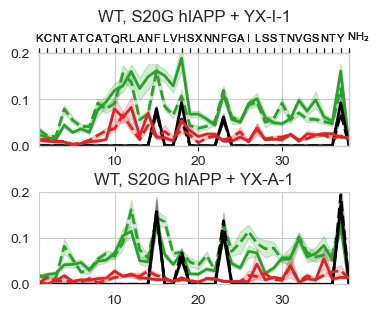

In [20]:
# bound fraction 
files = ["hphob_contacts.BF.dat", "aromatic_stacking.boundfraction.be.dat", "hbond_fraction.boundfraction.be.dat"]
lcolor = ['tab:green', "k", "tab:red"]

fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(4.,3.))
for l, file in enumerate(files): 
    for k, ax in enumerate(axs.flatten()): 
        lstyle = "-"
        
        if k > 0: 
            all_dirs = [WT_A_outdir, S20G_A_outdir]
            labels=["WT + YX-A-1", "S20G + YX-A-1"]
            new_labels = ["WT + YX-A-1", "S20G + YX-A-1"]
        else: 
            all_dirs = [ WT_I_outdir, S20G_I_outdir]
            labels = [
                "WT + YX-I-1", 
                "S20G + YX-I-1"
            ]
            new_labels = [
                "WT + YX-I-1",
                "S20G + YX-I-1"
            ]
        
        count = 0 
        for directory in all_dirs: 
            if count > 0: 
                lstyle="--"
            attr = np.loadtxt(directory+file) 
            upper = attr[:,1] + attr[:,2]
            lower = attr[:,1] - attr[:,2]
            sns.lineplot(x=attr[:, 0], y=attr[:, 1],
                        color= lcolor[l], linewidth=2, ax=ax, linestyle=lstyle)
            ax.fill_between(attr[:, 0], upper, lower, color=lcolor[l], alpha=0.2)
            count += 1

        ax.set_ylim(0.0, 0.2)
        ax.set_xlim(1, 38)
        # ax.set_xticks(fontsize=12)
        # ax.set_yticks(fontsize=12)
        #plt.xlabel('Residue', fontsize=22, labelpad=30)
        if k < 1: 
            axs[0].grid(True)
            ax2 = axs[0].twiny()
            top_ticks = np.arange(0, 38, 1)

            ax2.set_xticks(top_ticks)
            ax2.set_xticklabels([f'{i}' for i in sequence_ol_both[::1]], fontsize=8)
            ax2.grid(False)
# fig.text(0.0, 0.5, ' Interaction Type Probability', va='center', rotation='vertical')       
# axs[0].legend(loc='upper right', fontsize=10, bbox_to_anchor=(1.05, -0.15), ncol=3, frameon=False)
# axs[1].legend(loc='upper right', fontsize=10, bbox_to_anchor=(1.10, -0.15), ncol=3, frameon=False)
plt.subplots_adjust(wspace=0.1, hspace=0.5)
axs[0].set_title("WT, S20G hIAPP + YX-I-1", fontsize=12)
axs[1].set_title("WT, S20G hIAPP + YX-A-1", fontsize=12)
plt.savefig(outdir+'interaction.type.probability.wt.s20g.yxi1.yxa1.by.lig.paper.fig.pdf', dpi=400, bbox_inches='tight')

plt.show()

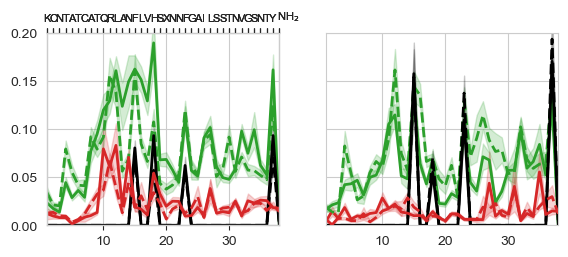

In [14]:
# bound fraction 
files = ["hphob_contacts.BF.dat", "aromatic_stacking.boundfraction.be.dat", "hbond_fraction.boundfraction.be.dat"]
lcolor = ['tab:green', "k", "tab:red"]

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(6.6,2.5), sharey=True)
for l, file in enumerate(files): 
    for k, ax in enumerate(axs.flatten()): 
        lstyle = "-"
        
        if k > 0: 
            all_dirs = [WT_A_outdir, S20G_A_outdir]
            labels=["WT + YX-A-1", "S20G + YX-A-1"]
            new_labels = ["WT + YX-A-1", "S20G + YX-A-1"]
        else: 
            all_dirs = [ WT_I_outdir, S20G_I_outdir]
            labels = [
                "WT + YX-I-1", 
                "S20G + YX-I-1"
            ]
            new_labels = [
                "WT + YX-I-1",
                "S20G + YX-I-1"
            ]
        
        count = 0 
        for directory in all_dirs: 
            if count > 0: 
                lstyle="--"
            attr = np.loadtxt(directory+file) 
            upper = attr[:,1] + attr[:,2]
            lower = attr[:,1] - attr[:,2]
            sns.lineplot(x=attr[:, 0], y=attr[:, 1],
                        color= lcolor[l], linewidth=2, ax=ax, linestyle=lstyle)
            ax.fill_between(attr[:, 0], upper, lower, color=lcolor[l], alpha=0.2)
            count += 1

        ax.set_ylim(0.0, 0.2)
        ax.set_xlim(1, 38)
        # ax.set_xticks(fontsize=12)
        # ax.set_yticks(fontsize=12)
        #plt.xlabel('Residue', fontsize=22, labelpad=30)
        if k < 1: 
            axs[0].grid(True)
            ax2 = axs[0].twiny()
            top_ticks = np.arange(0, 38, 1)

            ax2.set_xticks(top_ticks)
            ax2.set_xticklabels([f'{i}' for i in sequence_ol_both[::1]], fontsize=8)
            ax2.grid(False)
# fig.text(0.0, 0.5, ' Interaction Type Probability', va='center', rotation='vertical')       
# axs[0].legend(loc='upper right', fontsize=10, bbox_to_anchor=(1.05, -0.15), ncol=3, frameon=False)
# axs[1].legend(loc='upper right', fontsize=10, bbox_to_anchor=(1.10, -0.15), ncol=3, frameon=False)
# plt.subplots_adjust(wspace=0.1, hspace=0.5)
# axs[0].set_title("WT, S20G hIAPP + YX-I-1", fontsize=12)
# axs[1].set_title("WT, S20G hIAPP + YX-A-1", fontsize=12)
plt.savefig(outdir+'interaction.type.probability.wt.s20g.yxi1.yxa1.bf.pdf', dpi=400, bbox_inches='tight')

plt.show()